<a href="https://colab.research.google.com/github/Mayo-Radiology-Informatics-Lab/MIDeL-Chapters/blob/Review_from_Pouria/UsingPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Introduction

In [ ]:
### This is a test review 2!

This is intended to be a basic introduction to using pure PyTorch for machine learning.  Specifically, the focus is building and training deep learning models using PyTorch.  Make sure you choose a GPU accelerated Colab runtime before running any code cells.

Working with PyTorch comes with certain disadvantages compared to other deep learning frameworks such as MONAI, PyTorch Lightning, TensorFlow, or fast.ai.  Frameworks like these tend to abstract away much of the underlying code required to set up deep learning models, allowing you to quickly create and train new models by calling just a few functions.  PyTorch handles the creation of most of the basic elements needed to build and train models, but requires the programmer to assemble these elements into a training process.  Because you are generally required to write more code and have a better understanding of deep learning concepts, there's much more room for you to make mistakes and a higher barrier to entry for new researchers

So why work with PyTorch?  PyTorch's lower level approach provides direct control over how your model is fed data and what happens inside your model. Once you've understood how to set up the model training process in PyTorch, it's straightforward to make changes and experiment.  It can be quite complicated to expand the functionality of other, higher level frameworks or take full advantage of their features.  PyTorch, however, makes this relatively straightforward and as a result is an extremely flexible framework, so flexible that every aforementioned framework except Tensorflow is built on top of PyTorch.

As an example problem you might face, most deep learning frameworks natively handle natural images (RGB images saved in formats like png or jpg), but do not come with methods to handle medical imaging formats such as NIfTI or DICOM.  PyTorch does not natively handle these formats either, but because you can construct a custom `Dataset` and `DataLoader` for your model to use, a few extra lines of code can convert your imaging data into something your PyTorch model can interpret.  In comparison, other frameworks sometimes require extensive work or lengthy data conversion processes to handle unexpected data formats.

Finally, for the experienced Python programmer, PyTorch is widely regarded as very Pythonic.  Skills, conventions, and good habits learned in programming Python code transfer directly to coding with PyTorch.  PyTorch places few constraints on how the functions and classes you write must be constructed and allows you to easily integrate other libraries into your code.

[Official PyTorch Documentation](https://pytorch.org/docs/stable/index.html)

[Official PyTorch Tutorials](https://pytorch.org/tutorials/index.html)

For a deeper dive into PyTorch, [this book](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf) is recommended.

In [ ]:
# for the first part of this chapter we'll only need to import PyTorch and Torchvision
import torch
import torchvision

# Torchvision

Before we get into the details of model construction, it's worth briefly mentioning the torchvision package that you should have installed alongside PyTorch if you followed [PyTorch's installation instructions](https://pytorch.org/get-started/locally/).

To aid with computer vision tasks, many deep learning frameworks come with pre-built and pre-trained neural networks, pre-defined data transformation and augmentation methods, and routines to download commonly used datasets.  Torchvision is the PyTorch equivalent to this.  As seen below, this provides a very simple method for instantiating a model with PyTorch.

In [ ]:
model = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


These models come with a `pretrained` parameter that allows you to determine whether or not your model's weights and biases will be randomly initialized or initialized with weights and biases generated from training on an existing dataset, generally one derived from ImageNet.

While easy to create, models created using these preexisting architectures strongly constrain your data at both the input and output sides of your network.  They also influence how easy it is to perform certain advanced, or niche, tasks (such as reading intermediate activations).  This varies on a case-by-case basis for each model included in the package.

It's possible to work around these restrictions, or avoid them altogether.  To work towards that, we will begin looking at how custom model creation is done using PyTorch and come back to torchvision later in the chapter.

# Tensors

Mathematically, tensors are generalized version of matrices and vectors.  Put another way, vectors are 1 dimensional tensors and matrices are 2 dimensional tensors.  Tensors of 3 dimensions or more are just called tensors.

`torch.Tensor`s are largely true to this definition.  They are very similar to NumPy arrays but come with significantly expanded functionality.

Most processes in PyTorch are built on and run on tensors.  Your models' parameters are tensors, the data the model acts on are tensors, and the model's raw output will be tensors.  PyTorch contains several utilities to help you convert your data into tensors.  `torch.from_numpy`, which converts NumPy arrays to torch tensors, is one of the most commonly used.

Let's look at several ways to create tensors in PyTorch.

In [ ]:
one_hundred = [100]
one_hundred_tensor = torch.Tensor(one_hundred) # creating a tensor using preexisting data
ones_tensor = torch.ones((2,2)) # creating a 2x2 tensor with every value initialized to 1
zeros_tensor = torch.zeros((2,3,4)) # creating a 2x3x4 tensor with every value initialized to 0
print(one_hundred_tensor)
print(ones_tensor)
print(zeros_tensor)

tensor([100.])
tensor([[1., 1.],
        [1., 1.]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


For the most part, operations on `torch.Tensor`s behave like operations on NumPy arrays.  You can perform most basic mathematical operations on them, such as addition/subtraction/multiplication of scalars or other tensors.  `torch.Tensor`s also have properties familiar from NumPy arrays, such as shape and datatype.  However there are a couple new, especially important, properties that should be discussed, which are their gradient and device.



## Device

Device is fairly simple, it's a property that tells your program whether a tensor exists in GPU memory (these devices are generally named cuda:#) or in system RAM (devices named cpu).  NumPy arrays, for example, are always stored in system memory and always run calculations on your CPU, and a different library, such as CuPy, is required to do NumPy-like calculations on a GPU.  PyTorch allows us to create tensors and run calculations on them using either type of device, and allows us transfer them between devices with a simple function call.

Note that an error will occur if you attempt to create a cuda `Tensor` while your runtime environment does not have access to a GPU.

In [ ]:
a_tensor = torch.zeros((2,2)) # creating a tensor on the CPU
b_tensor = torch.zeros((2,2), device='cuda:0') # creating a tensor on GPU 0
print('a_tensor device: ' + str(a_tensor.device))
print('b_tensor device: ' + str(b_tensor.device))

a_tensor device: cpu
b_tensor device: cuda:0


In [ ]:
a_tensor = a_tensor.to('cuda:0') # moving the CPU tensor onto GPU 0
b_tensor = b_tensor.to('cpu') # moving the GPU tensor onto the CPU
print('a_tensor device: ' + str(a_tensor.device))
print('b_tensor device: ' + str(b_tensor.device))

a_tensor device: cuda:0
b_tensor device: cpu


## Gradient

Unlike NumPy arrays and similar data structures, PyTorch will automatically track gradients for `torch.Tensor`s.  An in-depth discussion on what this means is available [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

What this behind the scenes gradient tracking does is abstract away several calculations and make it simple to update your model's parameters during the training process.  It's possible to turn it off for a `Tensor` by setting the `requires_grad` parameter to `False`, or turn it off for calculations by running them within a `with torch.no_grad():` statement.  This is useful for data preprocessing and augmentation on input data or reducing memory requirements and speeding up operations that don't make use of the gradient.

It's probably easiest to understand how to use the gradient by seeing it in a live example, so keep an eye on the comments in the code below as we build a training loop.

# Creating Layers

Creating neural network layers in PyTorch is fairly straightforward.

In [ ]:
conv1 = torch.nn.Conv2d(3, 64, (3,3))

`conv1` is the variable name assigned to this layer, which is of type `torch.nn.Conv2d`.  [Looking at the documentation for this type of layer](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), we see that the first input parameter, 3, is the number of channels the layer needs as input, the second input parameter, 64, is the number of channels the layer will output, and the spatial size of the kernel this convolutional layer uses is (3,3).

PyTorch includes [a great variety of layers](https://pytorch.org/docs/stable/nn.html).  For computer vision purposes the most important layers are Convolution layers and Activation layers, but many other types of layers are used to improve training results.

# Building and Training a Simple Model from Scratch

In this section we will construct and train a simple model so we can see the full training process in PyTorch.  The PyTorch beginner tutorials contain a similar [example classifier for CIFAR-10](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html), on which much of the following code is based.  The code in our version is intended to be written in a more compartmentalized and more verbose way that should be easier to understand and extend more easily to complex projects.

## Downloading CIFAR-10 and building a DataLoader from a Dataset

Before building a model we need data and a problem to analyze.  For this example we are using the CIFAR-10 dataset.  This dataset consists of thousands of 32x32 color images of 10 different classes of object, as described on the [CIFAR website](https://www.cs.toronto.edu/~kriz/cifar.html).  The problem our model must resolve is identifying which class each image in our dataset belongs to.  Reasonable accuracy on this dataset can be achieved even with simple convolutional neural networks, so it's ideal for sketching the basic PyTorch pipeline for model training.

In order to pass data into our model, we must create a `Dataset` and a `DataLoader`.  You can think of these as two tools that work together to load files and feed them into your model.  The `Dataset` determines how data is acquired, which usually means how files are read and how the data within those files is preprocessed.  Most operations that you wish to perform on individual data objects, for instance some forms of normalization, are best done in the `Dataset`.  The `DataLoader` handles assembling batches of input from examples returned by the `Dataset`.

Fortunately, PyTorch comes with a pre-built CIFAR-10 Dataset that will download the data for us.  We'll cover how to create a custom `torch.utils.data.Dataset` later.  `torch.utils.data.DataLoader`s can be created directly from a `Dataset`, and there's generally no need to write a custom method.

In [ ]:
!rm -rf data

# torchvision.transforms.ToTensor() tells PyTorch to convert the images in the CIFAR-10 dataset into torch.Tensors
# Note for simplicity and unlike the PyTorch example we did not include a normalization transform
# though it's recommended to test how your results differ
# with and without normalization/standardizing/windowing your data
# depending on the modality and other characteristics of your problem
transform = torchvision.transforms.ToTensor()

# download (if needed) and create a CIFAR-10 dataset for training
train_dataset = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=transform)
# use the training dataset to create a training DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

# download (if needed) and create a CIFAR-10 dataset for validation
val_dataset = torchvision.datasets.CIFAR10('./data', train=False, download=True, transform=transform)
# use the validation dataset to create a validation DataLoader
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=True)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


As a general guideline, operations that happen within a `Dataset` should be limited to operations on CPU `Tensor`s, and operations that you'd prefer to perform on on CUDA `Tensor`s, such as most augmentation methods, should happen after the `DataLoader` assembles a batch and transfers the data to the GPU.  This helps speed up the training process by facilitating PyTorch multiprocessing routines and reducing the number of times data is transferred between your CPU and GPU, which is generally slow.  This is a peek ahead at advanced features, so make a mental note for the future, when you're creating your own datasets.

### Viewing the Data

Here we'll port some code from the PyTorch example to visualize a few examples of the CIFAR-10 data.  Run the following cell a couple times to see different examples.

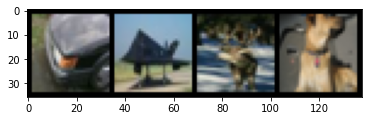

In [ ]:
# extra libraries needed for this cell that we haven't imported yet
import matplotlib.pyplot as plt
import numpy as np

# 128 images doesn't display nicely so we'll create a temporary DataLoader
# that will just display a few images at a time
view_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)

# get a random batch of training images
dataiter = iter(view_loader)
images, labels = dataiter.next()

# generate the grid of images to display
img_grid = torchvision.utils.make_grid(images)

# since we didn't normalize the dataset we're skipping the unnormalization step
# if you decide to normalize the data you will need to undo it before displaying them

# though pyplot will work with torch Tensors
# we'll convert to numpy to follow the PyTorch example
# in the advanced example you'll see how to display data
# without the conversion to numpy
npimg = img_grid.numpy()
# PyTorch models are generally built to have the channel (RGB) dimension
# as the zero (first) index, but most image viewing modules expect this
# information as the last (third) index
# so transpose the arrays before passing the data to pyplot
plt.imshow(np.transpose(npimg, (1, 2, 0)))
# finally display the data
plt.show()
# and delete the temporary DataLoader we made to free some resources
del view_loader

## Defining the Model Architecture

`torch.nn.Module` is the Python `class` that most neural networks and layers in PyTorch are based on.  If we define our neural network as a subclass of `torch.nn.Module`, PyTorch will automatically take care of most of the background methods required for our model to run.  While a general discussion on class inheritance in Python is out of place for this chapter, know that because of it all we need to do is define an `__init__` and `forward` method to build our model.

In [ ]:
# defining our CIFAR-10 model
class CIFAR10_Net(torch.nn.Module):
  # __init__ tells Python what to do when an object of the CIFAR10_Net class is created
  # in this case, it creates the layers that make up our network
  def __init__(self):
    # this defines our model as a subclass of torch.nn.Module
    # as a result, important functions such as backward() that we will see later are defined for us
    super(CIFAR10_Net, self).__init__()
    # because CIFAR-10 contains RGB images, our input layer must accept 3-channel images
    self.in_layer =  torch.nn.Conv2d(3, 8, (5,5))
    # we'll create one hidden convolutional layer
    self.hidden_conv =  torch.nn.Conv2d(8, 16, (5,5))
    # we add MaxPool2d layers to reduce the number of computations we need to make
    # and reduce the model's memory footprint
    self.pool = torch.nn.MaxPool2d((2, 2), 2)
    # a Flatten layer is the simplest way to convert a 2 or more dimensional array
    # into a 1 dimensional array
    self.flat = torch.nn.Flatten()
    # we'll also have one hidden fully connected layer to help classify the images
    # the number of input nodes required are 16 (channels) * 5 (kernel height) * 5 (kernel width) = 400
    self.hidden_fc = torch.nn.Linear(400, 100)
    # creating the output layer
    # because there are 10 classes in CIFAR-10, the output layer needs 10 output nodes
    self.out_layer = torch.nn.Linear(100, 10)
    # we'll use ReLU as our activation function throughout the model
    self.relu = torch.nn.ReLU()
  
  # the forward method defines the forward pass of data through our model
  # the backward method, created for us by PyTorch, wil define the backward
  # pass based on the forward method
  def forward(self, x):
    # input layer, activation, and pooling
    x = self.in_layer(x)
    x = self.relu(x)
    x = self.pool(x)
    # hidden convolution layer, activation, and pooling
    x = self.hidden_conv(x)
    x = self.relu(x)
    x = self.pool(x)
    # flattening the output of the convolutional part of the model
    # so it can be fed into the fully connected layers
    x = self.flat(x)
    # hidden fully connected layer and activation
    x = self.hidden_fc(x)
    x = self.relu(x)
    # output layer
    # note the model does not contain a softmax layer for final activation
    # the advantage to placing the final activation outside the model
    # is that certain loss functions incorporate final activations in their calculation
    # and models that don't contain final activations
    # can more easily test different loss functions
    x = self.out_layer(x)
    return x

# tell Python to create an instance of our CIFAR10_Net class on the GPU
net = CIFAR10_Net().cuda()

# if you do not want to run your model on GPU, define your model this way instead
# PyTorch assumes tensors should be created on the CPU unless you tell it otherwise
#net = CIFAR10_Net()

## Defining the Loss Function and Optimizer

PyTorch comes with many predefined loss functions (often referred to as `criterion`) and optimizers for your gradient updates.  Custom loss functions (such as those based on the Dice coefficient for segmentation) are commonly needed for medical imaging problems, but for the current problem built-in PyTorch methods are sufficient.

In [ ]:
# we use crossentropy loss for multi-category classification problems
# note that the PyTorch implementation of crossentropy loss calculates the log softmax before calculating the crossentropy
criterion = torch.nn.CrossEntropyLoss()
# Adam is one of the more commonly used optimizers, so we'll use that for this problem
optimizer = torch.optim.Adam(net.parameters(), lr=0.0003)

## Training a Simple Model

Here we make the largest divergence from the official PyTorch CIFAR-10 tutorial.  Rather than writing our training and validation passes as part of the `__main__` script, we will define two functions, one for training and one for validation, that control the behavior during each epoch.

While this change adds some complication, the additional compartmentalization will make our code more readable and easier to add functionality to, especially as the code grows more complicated.  It also helps prevent memory leaks that can happen when your code uses both multiprocessing and cuda.

In [ ]:
# Defining what happens during one epoch's worth of training
# Passing in our DataLoader, model, loss function and optimizer like this
# is not problem for PyTorch
def train_pass(data_loader, model, loss_fn, optim):
  # first we make sure the model is in train mode
  # so it will track gradients and unfreeze parameters
  model.train()
  # we define a running loss variable so we can track our model's progress
  running_loss =  0.0
  # now we define what happens as the model goes through the data within the DataLoader
  # this will iterate over the batches defined within the DataLoader
  for i, data in enumerate(data_loader, 0):
      # read the inputs, a list of [inputs, labels], from the batch
      inputs, labels = data
      # because we want to train on the GPU
      # we must send our inputs and labels to the GPU
      # comment out both of these lines if you prefer to run on the CPU
      inputs = inputs.cuda()
      labels = labels.cuda()

      # reset the gradients for every parameter in our optimizer to zero
      # so that we don't mix the loss for the current batch with the last batch
      optim.zero_grad()

      # get the outputs by sending our inputs through one forward pass of the model
      outputs = model(inputs)
      # calculate the loss by comparing our model's outputs to their labels
      # note: if our loss function did not include a softmax operation (or other final activation)
      # we would need to make sure to calculate it before calculating the loss
      loss = loss_fn(outputs, labels)
      # backward() calculates the gradient from the model's loss and stores it in
      # the model's tensors' gradient attribute
      loss.backward()
      # step() tells the optimizer to update our model's parameters
      optim.step()

      # add the loss for the current batch to our running loss variable
      running_loss += loss.item()

      # this controls how we want the training loop to report our model's progress
      # in this case every 100 batches we want it to print, then reset, the average loss
      if i % 100 == 99:
        print('Training loss: ' + str(running_loss/100))
        running_loss = 0.0

  # because all of the parameters that are updated are defined
  # outside the training loop we don't need this function to return anything
  # this line doesn't actually do anything, but is included just to make it clear
  # where this function ends
  return None

In [ ]:
# Now we'll define what happens when an epoch reaches the validation stage
# Note that we don't need to pass in the optimizer because we don't intend
# to update our model's parameters
def valid_pass(data_loader, model, loss_fn):
  # first we set the model to eval mode
  # this disables several under the hood operations that we won't need like gradient tracking
  # and will speed up the calculations within
  model.eval()
  # like before we define a loss variable to keep track of how our model performs
  val_loss = 0.0

  # because we don't want to calculate or track any gradients during validation
  # we tell PyTorch not to track any gradients for these calculations using
  # with torch.no_grad():
  with torch.no_grad():
    # now we define what happens as our model runs through the validation DataLoader
    for i, data in enumerate(data_loader, 0):
      # read the inputs, a list of [inputs, labels], from the batch
      inputs, labels = data
      # because we want to train on the GPU
      # we must send our inputs and labels to the GPU
      # comment out both of these lines if you prefer to run on the CPU
      inputs = inputs.cuda()
      labels = labels.cuda()

      # Note the lack of a backwards pass in the validation loop
      # because we're not going to perform any parameter updates or gradient calculations

      # get the outputs by sending our inputs through one forward pass of the model
      outputs = model(inputs)
      # calculate the loss by comparing our model's outputs to their labels
      # note: if our loss function did not include a softmax operation (or other final activation)
      # we would need to make sure to calculate it before calculating the loss
      loss = loss_fn(outputs, labels)

      # add the loss for the current batch to our validation loss
      val_loss += loss.item()

  # Finally we'll have our validation loop print the average loss of a validation batch
  print('Validation loss: ' + str(val_loss / len(data_loader)))

  # this again does nothing but mark where the function ends
  return None

In [ ]:
# Now we will actually run through model training and train for 5 epochs
for epoch in range(5):
  print('Epoch Number: ' + str(epoch))
  print('Entering training loop:')
  train_pass(train_loader, net, criterion, optimizer)
  print('Entering validation loop:')
  valid_pass(val_loader, net, criterion)
print('Finished Training')

Epoch Number: 0
Entering training loop:
Training loss: 2.232150161266327
Training loss: 1.9975754511356354
Training loss: 1.9067986106872559
Entering validation loop:
Validation loss: 1.7926508595671835
Epoch Number: 1
Entering training loop:
Training loss: 1.7673950612545013
Training loss: 1.726604413986206
Training loss: 1.663044056892395
Entering validation loop:
Validation loss: 1.6241749042197118
Epoch Number: 2
Entering training loop:
Training loss: 1.5952769529819488
Training loss: 1.5850767767429352
Training loss: 1.5540623795986175
Entering validation loop:
Validation loss: 1.5174735633632805
Epoch Number: 3
Entering training loop:
Training loss: 1.5189075481891632
Training loss: 1.4951364147663115
Training loss: 1.475145868062973
Entering validation loop:
Validation loss: 1.4892609360851818
Epoch Number: 4
Entering training loop:
Training loss: 1.4463101983070374
Training loss: 1.4331445682048798
Training loss: 1.435366494655609
Entering validation loop:
Validation loss: 1.41

## Saving the results of our training

The training process for this model was quite fast, but that won't always be the case.  Fortunately it's pretty easy to save PyTorch models for future use.

In [ ]:
# tell PyTorch where we want to save our model and what to call it
model_path = './CIFAR_Net.pth'
# we save our model's state_dict(), which save the model's parameters and tells PyTorch which layer they belong to
# but does not save our model's architecture, we need to make sure that is defined before we load a state_dict into it
torch.save(net.state_dict(), model_path)

## Running Inference Using a Simple Model

Before we run inference, let's create a new model and load the `state_dict` we saved earlier, so that we'll know how to do it in the future.

In [ ]:
# tell PyTorch where the model is saved
stored_model_path = './CIFAR_Net.pth'
# define the architecture of the network we will use for our inference
# we would need to include the code that defines CIFAR10_Net()
# if this were a new notebook or script making use of a model we had trained earlier
test_net = CIFAR10_Net()
# finally we tell PyTorch to load the state_dict from the file we saved earlier
# and to load it into the state_dict of our inference model
test_net.load_state_dict(torch.load(stored_model_path))

<All keys matched successfully>

Because this is just an example problem and we want to keep it simple, we'll reuse the validation `DataLoader` for our inference task even though this is a bad idea when solving real problems.

In [ ]:
test_loader = val_loader

And now we can calculate our model's accuracy on the "test" dataset.

In [ ]:
# creating a variable to track the number of images our model classified correctly
correct = 0
# getting the total number of images our model will be classifying
total = len(test_loader.dataset)
# as with the validation set we don't want PyTorch to calculate gradients
with torch.no_grad():
  # iterating over the test  set DataLoader
  for data in test_loader:
    # grab the images and labels from the batch
    images, labels = data
    # record the model's outputs
    # note that this time we run the model's outputs through a softmax function first
    # since we won't be using a loss function that does so automatically
    outputs = torch.nn.functional.softmax(test_net(images), dim=1)
    # finally we used an argmax function to convert our outputs into predicted classes
    predicted = torch.argmax(outputs, dim=1)
    # add the number of correct guesses we made for this batch to the total correct
    correct += (predicted == labels).sum().item()

# Finally, report our model's accuracy
accuracy = correct/total
print('Accuracy of the network on the test images: ' + str(accuracy))

Accuracy of the network on the test images: 0.4901


40-50% is not a particularly impressive accuracy, but considering we gave a very small model only a handful of epochs to train for, the model is doing much better than the 10% accuracy random guessing would give us.  Training for longer should give better results and you should test that.

There are two main things you should notice in this inference loop.  First is that the process used for running inference on your model is nearly identical to the validation loop we used during training.  You could even skip creating a test `DataLoader` and `Dataset`, as long as you make sure the data you pass into your model has had the same pre-processing performed on it that the batches from your `DataLoader` had while you were training.

Second is that we only used the CPU for the inference calculations.  Because we're not going to be calculating gradients or updating our model's parameters, there's relatively little to gain from pushing our computations to the GPU.  Since the model we're using is so small, the extra overhead needed to transfer data to the GPU memory may actually slow down our inference process.

# Segmentation with Advanced PyTorch

Now that we've built a relatively simple model in PyTorch to solve a relatively simple problem, we can move on to a harder, medically-relevant problem.  In this example we will train a segmentation model that looks at images of the abdomen and segment the pancreas.  In it we'll cover many issues we were able to avoid in the CIFAR-10 example, such as defining custom loss functions, defining a custom `Dataset`, constructing models with more complicated architectures, and some tricks to speed up training times.

Note: If you don't fully understand the previous example review and explore the concepts discussed during it.  This example expands on the code from that example and is substantially more complex.

The abdominal CT images and segmentation masks used in this example are provided courtesy of [The Cancer Imaging Archive](https://www.cancerimagingarchive.net/).

## Downloading and Organizing our Data

For this example the data is stored on an existing GitHub repository.  The following code downloads the images and segmentation masks and places them into labeled folders.

While building custom `Dataset`s gives you a lot of freedom in how you organize your data, the method used to organize the data here provides very few programming challenges.  Images and labels are stored separately, with labels named identically to the images except for a tag (in this case "-Mask") that can be easily picked out in your `Dataset`, and each different set of data, for training, validation, and testing, is stored in separate directories so your `Dataset` can simply consider every file of the appropriate type it sees as valid.

In [ ]:
# Now we'll download and organize our data
# First things first, we clean up any residual folders and data
# that may have existed from an earlier attempt to download the data
!rm -rf ./MC4-TensorflowUNet

!rm -rf trainimages
!mkdir trainimages
!rm -rf trainmasks
!mkdir trainmasks

!rm -rf validationimages
!mkdir validationimages
!rm -rf validationmasks
!mkdir validationmasks

!rm -rf testimages
!mkdir testimages
!rm -rf testmasks
!mkdir testmasks

# Next we clone the git repository the data is stored in
!git clone https://github.com/slowvak/MC4-TensorflowUNet.git

# Finally we unzip the files we've downloaded into the appropriate folders for
# training, validation, and testing images and segmentation masks
!unzip -q -o "./MC4-TensorflowUNet/Pt1.zip"
!unzip -q -o "./MC4-TensorflowUNet/Pt2.zip"
!mv *-Mask.jpg ./trainmasks
!mv *.jpg ./trainimages

!unzip -q -o "./MC4-TensorflowUNet/Pt3.zip"
!mv *-Mask.jpg ./validationmasks
!mv *.jpg ./validationimages

!unzip -q -o "./MC4-TensorflowUNet/Pt4.zip"
!mv *-Mask.jpg ./testmasks
!mv *.jpg ./testimages

Cloning into 'MC4-TensorflowUNet'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 368 (delta 29), reused 0 (delta 0), pack-reused 293
Receiving objects: 100% (368/368), 422.17 MiB | 39.40 MiB/s, done.
Resolving deltas: 100% (131/131), done.


## Creating a Custom `Dataset`

Creating custom `Dataset`s in PyTorch can be more or less straightforward depending on what format your files are saved in.  The data in this problem consists of .jpg files, so we will use the Python Imaging Library (PIL) to read the files.  Other formats, such as NIfTI or DICOM files, may require more complex behavior, such as recording statistics for volume normalization in the `__init__` method or assembling input data from only the appropriate parts of the file in the `__getitem__` method.

A couple things that you should definitely avoid doing in `Dataset`s, as mentioned earlier, are pushing input data onto the GPU and most augmentation routines.  It's much more efficient to run augmentation on a GPU whenever possible, and much more efficient to push entire batches of data to the GPU instead of the single examples returned by a `Dataset`.  Instead, inside the training/validation/testing routines is where you should push the batches your `DataLoader` returns to the GPU, then run augmentation routines before feeding that batch into your model.

In [ ]:
import torch
import torchvision
# we need a couple extra libraries to handle finding and opening our data files
import os
import PIL
import numpy as np

# defining a PyTorch Dataset is like defining any other new Python class
class SegmentationDataset(torch.utils.data.Dataset):
  # define the __init__ method that runs when the Dataset is created
  def __init__(self, image_dir, mask_dir):
    # image_dir represents the directory where the images are stored
    # mask_dir represents the directory where the masks are stored

    # for this problem we'll store file paths for the images and masks in a list
    # sometimes dictionaries are better
    # particularly for data files containing multiple inputs each
    self.data_items = []
    
    # this defines the transforms we'll apply to the data
    # for normal image formats such as .jpg and .png torchvision provides routines
    # to handle normalizing and converting the data into Tensors
    # for other data formats these will most likely need to be programmed separately
    # in those cases, the code you write does not need to be wrapped in a torchvision.Transform
    # as long as program your dataset so the __getitem__ method returns a Tensor
    # self.transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    self.transforms = torchvision.transforms.ToTensor()

    # using os.walk we look at every file in the image_dir directory
    for dirpath, _, files in os.walk(image_dir):
      for file in files:
        # record the path to the image file we're currently looking at
        image_path = os.path.join(dirpath, file)
        # because our data is saved with masks and images labeled identically
        # except for a `-Mask' tag, we can easily get the mask's filename from
        # the image's filename
        mask_file = file[:-4] + '-Mask.jpg'
        # now we can record the path to the mask file that corresponds
        # with the image we're looking at
        mask_path = os.path.join(mask_dir, mask_file)
        # finally we add a smaller list containing both paths to our list of data items
        self.data_items.append([image_path, mask_path])
  
  # the __getitem__ method is what the DataLoader calls to get one example of
  # input data and label/mask from the Dataset
  def __getitem__(self, index):
    # the DataLoader will give the Dataset an index
    # and the Dataset will return the corresponding data item

    # image paths were stored at the 0th position in our image/mask pairs
    image_path = self.data_items[index][0]
    # and mask paths at the 1st position
    mask_path = self.data_items[index][1]

    # PIL provides a method open the .jpg files our data is stored in
    # if your data was NIfTI images, for example, you would use methods
    # from NiBabel instead
    image_data = PIL.Image.open(image_path)
    mask_data = PIL.Image.open(mask_path)

    # the torchvision transforms we called will convert PIL images into torch Tensors
    # ToTensor() scales the image data to the range [0., 1.]
    image_tensor = self.transforms(image_data)

    # because we don't want to scale the masks, we must convert the mask PIL data
    # into a tensor without using the transform to maintain mask to integer values
    # we also need to include a conversion that sets any value greater than 0 as
    # part of our mask class, as our mask data actually includes values 0, 1, and 2
    # but for this problem we just want to segment pancreas and tumor as one object
    mask_tensor = torch.from_numpy((np.array(mask_data) > 0).astype(np.float32))
    # we need to add a batch dimension so the DataLoader can assemble batches of masks
    mask_tensor = torch.unsqueeze(mask_tensor, 0)

    # finally, return the tensors containing our input data and label
    return image_tensor, mask_tensor
  
  # __len__ returns the total number of items in the Dataset
  # and is used by the DataLoader to determine how many batches it needs to assemble
  def __len__(self):
    # since we stored the data in a list we can simply use the len() function
    # organizing your data in a dictionary, for example, may require
    # a more complicated routine or special consideration during assembly
    return len(self.data_items)

## Data Augmentation

Torchvision contains many [transforms](https://pytorch.org/vision/stable/transforms.html) that can be used for data augmentation.  While many of these can be used on PIL Images directly and composed with the `ToTensor()` transform to augment data in one step as it's being loaded, we'll instead write a new function that applies the augmentation to the data after it has been converted into a `Tensor`.

There are a few advantages to doing it this way.  First, for medical imaging formats it allows you to skip the data type conversions needed to convert your data into .jpg or .png compatible images.  Second it gives you substantially more flexibility in your network architectures, for example you might want your model's input to be multiple adjacent slices from a CT scan or the entire 3-D scan.  Also worth mentioning, specifically for segmentation problems, we need to apply any spatial distortions we apply to the input data to the mask as well.  In this case we need to make sure that the mask still lines up with an image of the pancreas that our augmentation routine has rotated.  Creating an augmentation function like this makes that more straightforward.

In [ ]:
# import random so we can randomly determine augmentation parameters
import random

# for the input to this function we need both the input data and the labels
# other types of problem, such as classification, may only need the augmentation
# applied to the input data
def augment_fn(x_tensor, y_tensor):
  """Randomly applies augmentations to the data."""
  
  # first we'll do a bit of error handling
  # because we're going to iterate over the batch we want to double check
  # that the number of items in the batch matches
  # for both the input data and the masks
  if x_tensor.size()[0] != y_tensor.size()[0]:
    raise AttributeError("x and y tensors have different batch sizes")

  # to make sure it stays possible for our model to see the original, unaugmented data
  # and increase the different types of patterns the model will need to learn
  # we assign probabilities to each of the types of augmentation we intend to apply
  aug_prob = 0.9 # any sort of augmentation
  brightness_prob = 0.5 # brightness adjustments
  rot_prob = 0.8 # image rotation
  # setting the maximum allowable angle of rotation
  max_rot = 10. # degrees

  # though it will be slower, we'll augment each item in the batch separately
  # to increase the diversity of training examples the model sees
  for batch_index in range(x_tensor.size()[0]):
    # first check if we're going to augment this example
    if random.random() < aug_prob:
      # if so, randomly choose the parameters that determine the degree of augmentation
      rot_angle = random.uniform(0., max_rot) # randomly pick the angle of rotation
      delta_brightness = random.uniform(0.95, 1.05) # randomly pick how much the brightness will be adjusted
      
      # this parameter is initialized to False so we only apply operations
      # to the mask if they happen to the image
      # in this case only rotation potentially needs to be applied to the mask
      rotate_mask = False

      # check if we're going to augment the image brightness
      if random.random() < brightness_prob:
        # the functional version of the torch transform gives us the ability to
        # set random parameters such as the degree we'll augment the brightness
        x_tensor[batch_index,...] = torchvision.transforms.functional.adjust_brightness(img=x_tensor[batch_index,...], brightness_factor=delta_brightness)
      # check if we're going to rotate the image
      if random.random() < rot_prob:
        # similarly to above, the functional version of this torch transform
        # lets us pick how many degrees we'll rotate the image by
        # which is important because we need to rotate the mask by the same amount
        x_tensor[batch_index,...] = torchvision.transforms.functional.rotate(img=x_tensor[batch_index,...], angle=rot_angle, interpolation=torchvision.transforms.InterpolationMode.BILINEAR)
        # since we rotated the image we set this to True
        rotate_mask = True

      # check if we need to rotate the mask
      if rotate_mask:
        # note that for mask rotation we use NEAREST interpolation instead of BILINEAR
        # because we want integer only values for our rotated segmentation masks
        y_tensor[batch_index,...] = torchvision.transforms.functional.rotate(img=y_tensor[batch_index,...], angle=rot_angle, interpolation=torchvision.transforms.InterpolationMode.NEAREST)

  # finally, return the augmented tensors
  return x_tensor, y_tensor

## Defining a U-Net Architecture

[U-Nets](https://en.wikipedia.org/wiki/U-Net) are the architecture typically used to solve segmentation problems.  Though this architecture is substantially more complex than the CIFAR-10 classification model we created earlier, the process used to create a U-Net from scratch in PyTorch is almost identical.

The primary differences come from how U-Nets are typically organized.  While the previous model was built using only a few layers, U-Nets contain many layers organized into several blocks that focus their operations at a given spatial scale within the image.  Fortunately PyTorch allows programmers to create layers, specifically instances of the `torch.nn.Module` class, from collections of layers/`Module`s.

Thanks to this feature, we can define the blocks we'll use to construct the U-Net as their own `Module`s, and make the code required to create the U-Net much simpler and more readable.

In [ ]:
# defining the blocks that compose the first half of the U-Net
# which handle downsampling the data and creating the input for the skip-layers
class UNet_down_block(torch.nn.Module):
  # initialize the layers used for the down block
  def __init__(self, input_channel, output_channel, down_size):
    # super is needed when subclassing to make sure the torch.nn.Module
    # properties are applied to these new, custom classes
    super(UNet_down_block, self).__init__()
    # to keep our network small we'll make the downblocks from relatively few layers
    # with two convolutional layers followed by batch normalization layers
    # for these layers we'll use 3x3 convolutional kernels with 1x1 padding around the edges
    self.conv1 = torch.nn.Conv2d(input_channel, output_channel, 3, padding=1)
    self.bn1 = torch.nn.BatchNorm2d(output_channel)
    self.conv2 = torch.nn.Conv2d(output_channel, output_channel, 3, padding=1)
    self.bn2 = torch.nn.BatchNorm2d(output_channel)
    self.max_pool = torch.nn.MaxPool2d(2, 2)
    self.relu = torch.nn.ReLU()
    # finally, a variable that tracks whether or not this downblock
    # should downsample its input before it analyzes the data
    self.down_size = down_size

  # define what happens in this block during the forward pass for the U-Net
  def forward(self, x):
    # first pass the input through a MaxPool layer
    # if we're going to downsample in this block
    if self.down_size:
      x = self.max_pool(x)
    # next run the data through the two convolutional layers
    x = self.relu(self.bn1(self.conv1(x)))
    x = self.relu(self.bn2(self.conv2(x)))
    # finally return the data
    return x

# the up blocks compose the second half of the U-Net
# and handle upsampling the data and interpreting the input from the skip layers
class UNet_up_block(torch.nn.Module):
  # initialize the layers used for the up block
  def __init__(self, prev_channel, input_channel, output_channel):
    super(UNet_up_block, self).__init__()
    # since we want to keep the network small we'll again only use two
    # convolutional layers with batch normalization per up block
    # again using 3x3 convolutional kernels and 1x1 padding around the edges
    # unlike last time we want to upsample within every up block so
    # we don't include a parameter to turn it off
    self.up_sampling = torch.nn.Upsample(scale_factor=2, mode='bilinear')
    self.conv1 = torch.nn.Conv2d(prev_channel + input_channel, output_channel, 3, padding=1)
    self.bn1 = torch.nn.BatchNorm2d(output_channel)
    self.conv2 = torch.nn.Conv2d(output_channel, output_channel, 3, padding=1)
    self.bn2 = torch.nn.BatchNorm2d(output_channel)
    self.relu = torch.nn.ReLU()

  # define what happens in this block during the forward pass for the U-Net
  def forward(self, prev_feature_map, x):
    # we up sample the input data first
    x = self.up_sampling(x)
    # then we concatenate the input from the previous layer
    # with the input from the skip connection
    x = torch.cat((x, prev_feature_map), dim=1)
    # then we run our data through the convolutional layers
    x = self.relu(self.bn1(self.conv1(x)))
    x = self.relu(self.bn2(self.conv2(x)))
    # and finally return it
    return x

# with the down and up blocks defined we can define the entire U-Net architecture
class UNet(torch.nn.Module):
  # initialize the layers used to define the architecture
  def __init__(self):
    # like the blocks, the UNet needs to subclass the Module class
    # even though the classes it's constructed from already do
    super(UNet, self).__init__()

    # first we define the 3 down blocks we'll use
    # to analyze our data at different spatial scales
    # we want the first down block to look at the data directly
    # so we don't tell it to down sample the data
    self.down_block1 = UNet_down_block(1, 16, False)
    # note that, as the spatial scale of our data shrinks, we
    # increase the number of features our network can use
    self.down_block2 = UNet_down_block(16, 32, True)
    self.down_block3 = UNet_down_block(32, 64, True)

    # U-Nets also contain one or more convolutional layers
    # at the center that do some additional processing before
    # the data is upsampled again, in this case we'll only use one
    # this could also be defined as a center block like we did for the
    # down and up blocks, but since we're doing a relatively
    # simple operation in this network's center there's no need
    self.mid_conv1 = torch.nn.Conv2d(64, 64, 3, padding=1)
    self.bn1 = torch.nn.BatchNorm2d(64)

    # finally we define the up blocks
    # note we need one less than the number of down blocks
    # because these are the counterparts to the down blocks
    # that down sampled the data as it passed through them
    self.up_block1 = UNet_up_block(32, 64, 32)
    self.up_block2 = UNet_up_block(16, 32, 16)

    # and now the final "block" which will do the model's final interpretation
    # at the scale of the original image
    self.last_conv1 = torch.nn.Conv2d(16, 16, 3, padding=1)
    self.last_bn = torch.nn.BatchNorm2d(16)
    self.last_conv2 = torch.nn.Conv2d(16, 1, 1, padding=0)

    # the activation function only needs to be defined once
    # so we'll just define it at the end
    self.relu = torch.nn.ReLU()

  # define what happens during the forward pass for this U-Net
  def forward(self, x):
    # to create the pathways for the skip layers we create several variables
    # that store the output of the down blocks
    
    # this layer operates at the scale of the input data, scale: (1,1)
    self.x1 = self.down_block1(x)
    # downsampled once, scale (0.5, 0.5)
    self.x2 = self.down_block2(self.x1)
    # downsampled twice, scale (0.25,  0.25)
    self.x3 = self.down_block3(self.x2)
    self.x3 = self.relu(self.bn1(self.mid_conv1(self.x3)))
    # this will upsample the tensor back to scale (0.5, 0.5)
    x = self.up_block1(self.x2, self.x3)
    # and finally the tensor is upsampled back to scale (1, 1)
    x = self.up_block2(self.x1, x)
    x = self.relu(self.last_bn(self.last_conv1(x)))
    # note that the last convolutional layer does not undergo batch normalization
    # or a final activation, as before this is to preserve flexibility with
    # some of PyTorch's provided loss functions and calculations
    x = self.last_conv2(x)
    return x

Note that larger U-Nets are likely to have better results, and experiments with them can be done by simply inserting more convolutional layers, or any other kind of layer you'd like to experiment with.  Just make sure to keep track of what spatial scale each layer is operating on to avoid crashes during training.

## Defining a Loss Function

Custom loss functions in PyTorch can be defined simply by creating a function that calculates a loss value from `Tensor` inputs.  PyTorch loss functions typically have two versions, a functional version that defines the underlying mathematics, and a `torch.nn.modules.loss._Loss` version that typically calls the functional version.  While the latter isn't necessary, to emulate PyTorch native loss functions and make sure we have access to any related methods we might need from native PyTorch, we will use a loss function that subclasses `loss._Loss`.

Dice loss, or 1 - the [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient), is typically used for segmentation problems.  To keep the focus on PyTorch we'll use a standard "soft" Dice loss, which just compares the intersections of two areas to their union.  Since we're only segmenting a single class, we'll design a version for networks with sigmoid final activations.  We'll also design it to only look at the foreground, or class(es) we're predicting, so the model doesn't mistake the large background area as being more important than the pancreas.

In [ ]:
# this decorator tells PyTorch to attempt to compile the operations
# in the decorated function into one CUDA operation
# which can speed up multi-step calculations
# the function would run just as well without it, but may be slower
@torch.jit.script
# defining a function that calculates the soft Dice loss
def func_dice_loss_sigmoid(pred, targ):
  # pred consists of values in the range [0, 1]
  # this is what makes this Dice loss "soft"
  # the continuous loss calculations this results in give the model
  # the ability to smoothly improve its predictive ability

  # "hard" Dice losses will apply a threshold to the model's predictions that
  # forces them to be either 0 or 1
  # this is useful as a metric on your validation and test sets
  # but makes the training process much less reliable
  # because the model's predictions become discontinuous

  # targ will be either 0 (for background) or 1 (for the class we're predicting)
  # this should generally be true unless you are experimenting with label smoothing
  # which is outside the scope of this chapter

  # this factor prevents divide-by-zero errors
  eps = 1.e-5
  # first transfer the inputs to the GPU
  # as the large matrix multiplications will otherwise be slow
  pred = pred.cuda()
  targ = targ.cuda()
  # calculate the interesection between the two Tensors
  inter = torch.sum(pred * targ)
  # calculate their union
  union = torch.sum(pred + targ)
  # calculate the Dice coefficient and subtract it from 1
  # to get the soft Dice loss
  loss = 1. - (2. * inter + eps) / (union + eps)
  # finally, return the loss
  return loss

# subclassing PyTorch's native loss class so we can easily ensure
# our code plays nice with the underlying PyTorch calculations (e.g. backward())
class DiceLossSigmoid(torch.nn.modules.loss._Loss):
  # initialize this class as a loss._Loss subclass
  def __init__(self) -> None:
    super(DiceLossSigmoid, self).__init__()

  # define the forward() method
  # which implicitly defines the backward() method
  # thanks to us subclassing the loss._Loss class
  def forward(self, preds, target):
    return func_dice_loss_sigmoid(preds, target)

For multi-class segmentation problems, designed for the output from SoftMax activations, the calculations look similar, though the background becomes a represented class (typically class 0) and must be specifically excluded in your code if you encounter issues with your segmentation model predicting everything as background.

## Setting Up the Training Process

For this example we'll add several components to the training process that typically improve the results and speed.  This gives us several more hyperparameters to set, so rather than hard-coding them as we did in the simpler example above, we'll define them all in one place so it's easier to keep track of their values and make changes when experimenting with different hyperparameter combinations.

In [ ]:
# how many epochs we will train the model for
train_epochs = 5
# what the Adam optimizer's learning rate will be set to
# note that using a learning rate scheduler, as we are, overrides this value
adam_lr = 0.0003
# as we want to use a one-cycle training schedule we must set the scheduler's hyperparameters
# while it allows us to configure several hyperparameters
# we'll only hardcode the max learning rate and allow it to use
# default values for the other configurable parameters
max_lr = 0.03
# for this particular example, with relatively little preprocessing done on the dataset,
# multiprocessing is unlikely to noticeably speed up our data loading process
# but we'll include it for future reference
workers = 2
# finally, setting the batch size our DataLoaders will use
batchsize = 32

As hinted in the code above, the implementation of a learning rate scheduler is one of the primary differences from the training process used in this example.  In this case, we'll use a [One-Cycle learning rate policy](https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.OneCycleLR).  The second major difference is the use of [automated mixed precision](https://pytorch.org/docs/stable/amp.html).

In short, what a One-Cycle policy does is start training the model with a small learning rate, increase to a very high learning rate over the first 1/3 of the training epochs, and finally slowly decrease it to a very small learning rate.  Using a high learning rate in this way helps regularize our model's parameters, making them more likely to avoid overfitting, and makes them converge faster.  However, it can make the model's training progress difficult to interpret as the loss frequently gets worse during the first half of the training cycle.


[Mixed precision](https://docs.nvidia.com/deeplearning/performance/mixed-precision-training/index.html), on the other hand, doesn't modify hyperparameters but converts the underlying datatypes used for `Tensor` calculations between full (`float32`) and half (`float16`) precision at certain points in the training process.  The main advantage this brings is faster training, with some potential to help avoid overfitting.  One thing to note is that you can train using larger batch sizes (often by a factor of 2) using mixed precision and, if you decide to use it, you should test how much larger you can make your batches before running into GPU memory issues.  Automated mixed precision, as the name implies, will automatically manage the datatype conversions required in mixed precision training with just a few additions to the code.

In [ ]:
# create our U-Net on the GPU
unetmodel = UNet().cuda()

# creating the training Dataset and DataLoader
# note that we've now defined the num_workers parameter, which turns on multiprocessing
trainset = SegmentationDataset('./trainimages', './trainmasks')
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batchsize, shuffle=True, num_workers=workers)

# creating the validation Dataset and DataLoader
valset = SegmentationDataset('./validationimages', './validationmasks')
val_loader = torch.utils.data.DataLoader(valset, batch_size=batchsize, shuffle=True, num_workers=workers)

# creating the test Dataset and DataLoader
testset = SegmentationDataset('./testimages', './testmasks')
test_loader = torch.utils.data.DataLoader(testset, batch_size=batchsize, shuffle=True, num_workers=workers)

# setting our custom Dice loss function as the optimization criterion for our model
criterion = DiceLossSigmoid()

# setting Adam as the gradient optimizer for the training process
optimizer = torch.optim.Adam(unetmodel.parameters(), lr=adam_lr)
# setting OneCycleLR as our learning rate scheduler
# note that this requires as input the optimizer it will be operating on
# the maximum learning rate it is allowed to set which determines the initial and final learning rates
# alongside the div_factor and final_div_factor parameters we've left at the default
# and some information that tells it when it should adjust the learning rate
# in this case we tell it how many epochs we will train for and how many steps it should take per epoch
# which in this case is one step per batch
# though there's also the option to tell it the total number of steps it should take instead
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=max_lr, epochs=train_epochs, steps_per_epoch=len(train_loader))

# finally creating the scaler that we need for automated mixed precision training
scaler = torch.cuda.amp.GradScaler()

## Viewing the Data

Now that the `DataLoader`s are set up, let's take a look at the data they're giving us.

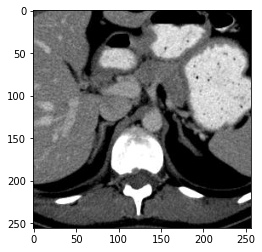

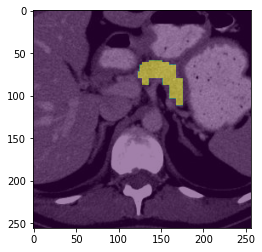

In [ ]:
# importing pyplot here in case you didn't run the previous example
import matplotlib.pyplot as plt

# again defining a temporary DataLoader with a smaller batch_size
# to make viewing images more convenient
view_loader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

# get a random training image from the DataLoader
dataiter = iter(view_loader)
images, masks = dataiter.next()

# pyplot wants either 3-D images with RGB color channels
# or 2-D images it renders according to the colormap you give it
# so we select the spatial information from our batch of shape [B, C, X, Y]
img = images[0, 0, :]
mask = masks[0, 0, :]

# plot the image in grayscale
plt.imshow(img, cmap='gray')
plt.show()
# plot the mask on top of the image for comparison
plt.imshow(img, cmap='gray')
plt.imshow(mask, alpha=0.5)
plt.show()

To make sure everything is working correctly, we should also check that the augmentation function is returning sensible results and keeping the masks lined up with during rotations.

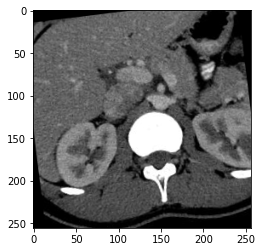

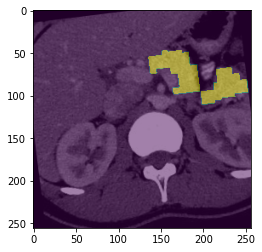

In [ ]:
# get a random training image
dataiter = iter(view_loader)
images, masks = dataiter.next()

# since our augmentation is applied on the batch level
# apply augmentation before picking out the 2-D image we want to view
images, masks = augment_fn(images, masks)

# again selecting the 2-D spatial information pyplot needs
img = images[0, 0,:]
mask = masks[0, 0, :]

# plotting the augmented image
plt.imshow(img, cmap='gray')
plt.show()
# plot the augmented mask on top of the augmented image for comparison
plt.imshow(img, cmap='gray')
plt.imshow(mask,alpha=0.5)
plt.show()

## Building a Training Loop with Automated Mixed Precision

Now that we've set the hyperparameters and created all of the components needed for the training process, it's time to define the training and validation functions.  There are a couple new parameters added to the training function this time: a `lr_scheduler` parameter, so we can pass in the learning rate scheduler we defined earlier, and a `grad_scaler` parameter, so we can pass in the gradient scaler that helps manage automated mixed precision for us.  For flexibility, both parameters have been made optional and the training loop will run as is with either parameter missing.

[As learning rate schedulers adjust the optimizer, there is a question when they should adjust, or step, the optimizer](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate).  For `OneCycleLR`, that's after every batch, so we include it in our training function to step the optimizer at the end of each batch.  Other schedulers are designed to step the optimizer at the end of each epoch (or potentially after several epochs) and you should instead step them after the validation loop.  This is shown in a line of commented out code when we run the actual training process.

Gradient scalers are implemented in a [pretty particular way](https://pytorch.org/tutorials/recipes/recipes/amp_recipe.html).  A short description is that you must tell PyTorch to `autocast()` the output of your model and loss function, then use the scaler to wrap the `backward()` pass, the optimizer `step()`, and your model's weight `update()` to help prevent divergent behavior.  It's a simple process that's difficult to describe well.  It's much easier to understand by looking at examples, see the code below.

In [ ]:
# Defining what happens during one epoch's worth of training
# Passing in our DataLoader, model, loss function, etc.
# like this is not a problem for PyTorch
def train_pass(data_loader, model, loss_fn, optim, lr_scheduler = None, grad_scaler = None):
  # first we make sure the model is in train mode
  # so it will track gradients and unfreeze parameters
  model.train()
  # we define a running loss variable so we can track our model's progress
  running_loss =  0.0
  # now we define what happens as the model goes through the data within the DataLoader
  # this will iterate over the batches defined within the DataLoader
  for i, data in enumerate(data_loader, 0):
    # this is a more efficient way to reset the gradient
    # though there may be cases where other parts of your code are incompatible
    # see: https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer.zero_grad
    for param in model.parameters():
      param.grad = None

    # using automated mixed precision
    if grad_scaler is not None:
      # read the inputs, a list of [inputs, masks], from the batch
      inputs, masks = data
      # because we want to train on the GPU
      # we must send our inputs and masks to the GPU
      # comment out both of these lines if you prefer to run on the CPU
      inputs = inputs.cuda()
      # for mixed precision to work we need to ensure the data type
      # of our masks is float 32 and convert them if not
      masks = masks.long().cuda()

      # augment the data
      # augmentation should be run in such a way that it doesn't affect the model's gradients
      # so this function is enclosed within torch.no_grad()
      with torch.no_grad():
        inputs, masks = augment_fn(inputs, masks)

      # before we feed the input to the model we tell PyTorch to autocast
      # the enclosed operations into the appropriate datatypes where applicable
      # where the operations may be a convolutional layer, other tensor operation
      # or something else
      with torch.cuda.amp.autocast():
        # get the outputs by sending our inputs through one forward pass of the model
        # note the outputs of the model are first run through a sigmoid function
        # as the loss function we created does not include a final activation
        outputs = torch.sigmoid(model(inputs))

        # calculate the loss by comparing the model's outputs to the corresponding masks
        loss = loss_fn(outputs, masks)

      # first, scale the loss so that the gradients generated by backward() are scaled
      grad_scaler.scale(loss).backward()
      # scaler.step() unscales the gradients and calls the optimizer
      # if the unscaled gradients are all finite numbers
      # otherwise it skips stepping the optimizer
      grad_scaler.step(optim)
      # finally, update the scaler's scale for the next batch
      grad_scaler.update()

    # the training loop when there is no gradient scaler
    # effectively unchanged from the previous example
    # except where necessary for the different loss function etc. needed
    else:
      # read the inputs, a list of [inputs, masks], from the batch
      inputs, masks = data
      # because we want to train on the GPU
      # we must send our inputs and masks to the GPU
      # comment out both of these lines if you prefer to run on the CPU
      inputs = inputs.cuda()
      masks = masks.cuda()

      # augment the data
      inputs, masks = augment_fn(inputs, masks)

      # get the outputs by sending our inputs through one forward pass of the model
      # note the outputs of the model are first run through a sigmoid function
      # as the loss function we created does not include a final activation
      outputs = torch.sigmoid(model(inputs))

      # calculate the loss by comparing the model's outputs to the corresponding masks
      loss = loss_fn(outputs, masks)
      # backward() calculates the gradient from the model's loss and stores it in
      # the model's tensors' gradient attribute
      loss.backward()
      # step() tells the optimizer to update our model's parameters
      optim.step()

    # add the loss for the current batch to our running loss variable
    running_loss += loss.item()

    # explicitly clearing memory to prevent memory leaks
    del inputs, masks, outputs

    # this controls how we want the training loop to report our model's progress
    # in this case every 10 batches we want it to print, then reset, the average loss
    if i % 10 == 9:
      print('Training loss: ' + str(running_loss/10))
      running_loss = 0.0
    
    # stepping the learning rate scheduler, for those that are stepped after each batch
    if lr_scheduler is not None:
      scheduler.step()

  # because all of the parameters that are updated are defined
  # outside the training loop we don't need this function to return anything
  # this line doesn't actually do anything, but is included just to make it clear
  # where this function ends
  return None

While the training function requires a few changes to account for the additions to our training process, the validation function from before will work almost exactly as is.  We don't intend to update the model during this process so there is nothing for the learning rate scheduler or the gradient scaler to do in this function and no need to invoke `autocast()`.  All we need to do is change the loss function and make sure the model's outputs go through a sigmoid final activation.

In [ ]:
# Now we'll define what happens when an epoch reaches the validation stage
# Note that we don't need to pass in the optimizer because we don't intend
# to update our model's parameters
def valid_pass(data_loader, model, loss_fn):
  # first we set the model to eval mode
  # this disables several under the hood operations that we won't need like gradient tracking
  # and will speed up the calculations within
  model.eval()
  # like before we define a loss variable to keep track of how our model performs
  val_loss = 0.0

  # because we don't want to calculate or track any gradients during validation
  # we tell PyTorch not to track any gradients for these calculations using
  # with torch.no_grad():
  with torch.no_grad():
    # now we define what happens as our model runs through the validation DataLoader
    for i, data in enumerate(data_loader, 0):
      # read the inputs, a list of [inputs, masks], from the batch
      inputs, masks = data
      # because we want to train on the GPU
      # we must send our inputs and masks to the GPU
      # comment out both of these lines if you prefer to run on the CPU
      inputs = inputs.cuda()
      masks = masks.cuda()

      # Note the lack of a backwards pass in the validation loop
      # because we're not going to perform any parameter updates or gradient calculations

      # get the outputs by sending our inputs through one forward pass of the model
      outputs = torch.sigmoid(model(inputs))
      # calculate the loss by comparing our model's outputs to their masks
      # note: if our loss function did not include a softmax operation (or other final activation)
      # we would need to make sure to calculate it before calculating the loss
      loss = loss_fn(outputs, masks)

      # add the loss for the current batch to our validation loss
      val_loss += loss.item()

      # explicitly clearing memory to prevent memory leaks
      del inputs, masks, outputs

  # Finally we'll have our validation loop print the average loss of a validation batch
  print('Validation loss: ' + str(val_loss / len(data_loader)))

  # this again does nothing but mark where the function ends
  return None

## Training and Testing our Model

As before actually training our model is relatively simple after defining our training and validation functions.  The only changes are that hardcoded parameters, such as the number of epochs have been replaced by the variables defined above and the `train_pass` function has a few extra parameters passed into it.  There's also a line indicating where to step a learning rate scheduler that is stepped every epoch instead of every batch.

In [ ]:
# Now we will actually run through model training
for epoch in range(train_epochs):
  print('Epoch Number: ' + str(epoch))
  print('Entering training loop:')
  train_pass(train_loader, unetmodel, criterion, optimizer, scheduler, scaler)
  print('Entering validation loop:')
  valid_pass(val_loader, unetmodel, criterion)
  # OneCycleLR needs to be stepped after each batch
  # but other schedulers are stepped after each epoch
  # learning rate schedulers that step after epochs should call step() here
  #scheduler.step()
print('Finished Training')

Epoch Number: 0
Entering training loop:


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Training loss: 0.9494662940502167
Training loss: 0.9360265493392944
Training loss: 0.9302865564823151
Training loss: 0.9253305912017822
Training loss: 0.8831898331642151
Training loss: 0.8354575872421265
Entering validation loop:
Validation loss: 0.983481658829583
Epoch Number: 1
Entering training loop:
Training loss: 0.7870837032794953
Training loss: 0.7216601490974426
Training loss: 0.6909210622310639
Training loss: 0.6988736987113953
Training loss: 0.6544290244579315
Training loss: 0.6165353953838348
Entering validation loop:
Validation loss: 0.9991998871167501
Epoch Number: 2
Entering training loop:
Training loss: 0.6072560966014862
Training loss: 0.6120871305465698
Training loss: 0.5813338339328766
Training loss: 0.5781486392021179
Training loss: 0.5627292513847351
Training loss: 0.5002581536769867
Entering validation loop:
Validation loss: 0.49497220251295304
Epoch Number: 3
Entering training loop:
Training loss: 0.5211273312568665
Training loss: 0.48707315325737
Training loss: 0

The testing loop is again very similar to the validation loop, with the only changes being to the loss function and the model's final activation, as specified by the different task we're testing.

In [ ]:
# as with the validation set we don't want PyTorch to calculate gradients
with torch.no_grad():
  running_loss = 0.0
  # iterating over the test  set DataLoader
  for data in test_loader:
    # grab the images and masks from the batch
    inputs, masks = data
    inputs = inputs.cuda()
    masks = masks.cuda()
    # record the model's outputs
    outputs = torch.sigmoid(unetmodel(inputs))
    running_loss += DiceLossSigmoid()(outputs, masks).item()
  
  avg_loss = running_loss / len(test_loader)
  print("Test Loss: " + str(avg_loss))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Test Loss: 0.4091438889503479


### Visualizing the Training Results

Finally, let's double check that the segmentations the model generates look sensible.  Giving the model just a short time to train is unlikely to provide great results, but we can at least verify it's on the right track.

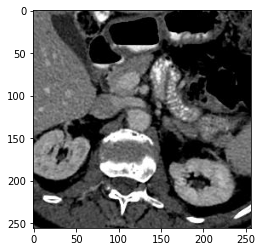

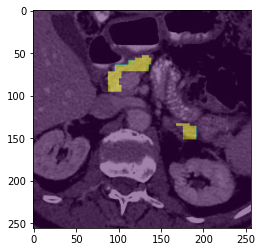

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


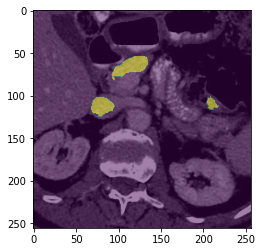

In [ ]:
# move the model to the CPU
model = unetmodel.cpu()

# get a random single-example batch from the DataLoader
# we defined earlier to help with visualizing the data
# you could instead build a new single-example DataLoader
# from the validation or test Datasets
dataiter = iter(view_loader)
images, masks = dataiter.next()

# pyplot wants either 3-D images with RGB color channels
# or 2-D images it renders according to the colormap you give it
# so we select the spatial information from our batch of shape [B, C, X, Y]
img = images[0, 0, :]
mask = masks[0, 0, :]

# plot the image in grayscale
plt.imshow(img, cmap='gray')
plt.show()
# plot the mask on top of the image for comparison
plt.imshow(img, cmap='gray')
plt.imshow(mask, alpha=0.5)
plt.show()

# generate predictions using the trained model
outputs = torch.sigmoid(model(images))
# the standard threshold used with sigmoid is 0.5, so we'll use that here
predictions = (outputs > 0.5).long()

# plot the predictions on top of the image for comparison
plt.imshow(img, cmap='gray')
plt.imshow(predictions[0,0,:], alpha=0.5)
plt.show()

With a training loss of about 0.4, or a Dice coefficient of about 0.6, the predictions are unlikely to be great.  However, it does look like the model is generating reasonable segmentations in roughly the correct area, and we can feel comfortable saying that the model is actually learning something about how to identify the pancreas.